<a href="https://colab.research.google.com/github/Pdugovich/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

## 1) Write a function def prob_drunk_given_positive

---

(Information to use for function)

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# multiple-run bayes theorem function
def prob_drunk_given_positive(prob_positive_drunk, prob_positive_non_drunk, prob_drunk_prior):
  numerator = prob_positive_drunk * prob_drunk_prior
  denominator = numerator + (prob_positive_non_drunk * (1-prob_drunk_prior))
  return numerator / denominator 

In [0]:
accuracy = []
prior = 0.001
for _ in range(10):
  result = prob_drunk_given_positive(1, 0.08, prior)
  accuracy.append(result)
  prior = result


In [80]:
print(accuracy)

[0.012357884330202669, 0.13525210993291495, 0.6615996951348605, 0.9606895076105054, 0.9967371577896734, 0.9997381867081508, 0.9999790498904363, 0.9999983239589307, 0.9999998659165077, 0.9999999892733192]


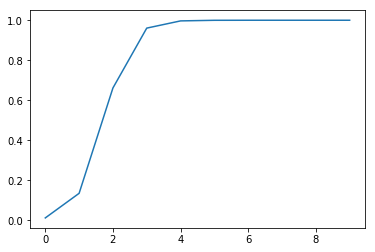

In [81]:
plt.plot(accuracy)

## 2) Explore scipy.stats.bayes_mvs - read its documentation, and experiment with it on data you've tested in other ways earlier this week

In [0]:
import scipy.stats as stats

In [102]:
def sample_confidence_interval(data, confidence_level=0.95):
  data = np.array(data)
  mean = sum(data) / len(data)
  std_error = np.std(data, ddof=1) / (len(data))**(1/2)
  t_value = stats.t.ppf((1 + confidence_level) / 2.0, len(data) - 1)
  margin = t_value * std_error
  return (mean, mean - margin, mean + margin)


sample_confidence_interval(accuracy)

(0.7766351770545501, 0.5005677293893328, 1.0527026247197675)

In [84]:
stats.bayes_mvs(accuracy)

(Mean(statistic=0.7766351770545501, minmax=(0.5529271089614349, 1.0003432451476653)),
 Variance(statistic=0.19148260242823067, minmax=(0.07922335783644321, 0.40310758769959765)),
 Std_dev(statistic=0.42228502464685647, minmax=(0.2814664417589479, 0.6349075426387669)))

### Just copying code to get data from previous lecture

In [85]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-18 23:05:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-09-18 23:05:27 (286 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [86]:
names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=names)
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'?': np.NaN, 'y':1, 'n': 0})

In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
dem['aid-to-contras']

#Dropping nas to use with function
dem_contras = dem['aid-to-contras'].dropna()

In [0]:
def sample_confidence_interval(data, confidence_level=0.95):
  data = np.array(data)
  mean = sum(data) / len(data)
  std_error = np.std(data, ddof=1) / (len(data))**(1/2)
  t_value = stats.t.ppf((1 + confidence_level) / 2.0, len(data) - 1)
  margin = t_value * std_error
  return (mean, mean - margin, mean + margin)

In [101]:
sample_confidence_interval(dem_contras)

(0.8288973384030418, 0.7830845214499413, 0.8747101553561423)

In [103]:
#Very close, but not exact
stats.bayes_mvs(dem_contras)

(Mean(statistic=0.8288973384030418, minmax=(0.7904918135550497, 0.8673028632510338)),
 Variance(statistic=0.14346300087744912, minmax=(0.12402259696569803, 0.16539838535710194)),
 Std_dev(statistic=0.37840107859159805, minmax=(0.3521684213067634, 0.40669200306509823)))

## 3) Visualizing Bayes v Frequentist

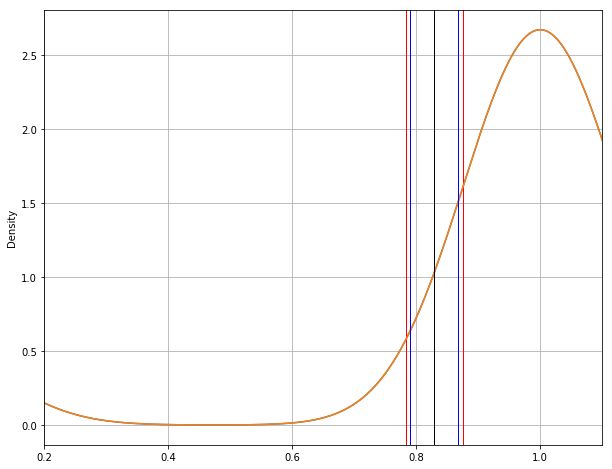

In [130]:
# Looking at the two confidence intervals against each other,
#the means are the same, but the intervals are slightly off, 
#Using stats.bayes_mvs yields tighter margins of error than 
#the function we made.

dem_contras.plot(kind='density', figsize=(10,8))
plt.grid()
CI = sample_confidence_interval(dem_contras)
plt.axvline(x=CI[1], color='red', lw=1)
plt.axvline(x=CI[2], color='red', lw=1)
plt.axvline(x=CI[0], color='black', lw=1);

dem_contras.plot(kind='density', figsize=(10,8))
#zooming in to get a better viewof the different margins
plt.xlim(left = .2, right=1.1)
plt.grid()
CI = stats.bayes_mvs(dem_contras)
#There's a lot more going on in bayes_mvs, so a lot of indexing.
plt.axvline(x=CI[0][1][0], color='blue', lw=1)
plt.axvline(x=CI[0][1][1], color='blue', lw=1)
plt.axvline(x=CI[0][0], color='black', lw=1);

In [113]:
CI

(Mean(statistic=0.8288973384030418, minmax=(0.7904918135550497, 0.8673028632510338)),
 Variance(statistic=0.14346300087744912, minmax=(0.12402259696569803, 0.16539838535710194)),
 Std_dev(statistic=0.37840107859159805, minmax=(0.3521684213067634, 0.40669200306509823)))

## 4) Difference between Baysian and Frequentist

Frequentist methods involve drawing conclusions from sampling, the larger the sample, the more confident they are in their conclusions.

Baysian methods don't need large samples, but require prior knowledge of probabilities to make confident conclusions.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)